# Contents

This script contains the following:

#### 1. Importing Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Correlations
         Education Completion Analysis
         Out of School Analysis
     Scatterplots
         Upperschool Completion & GDP
         Primary Completion & GDP
         Upperschool Completion & Happiness Rank
         Upperschool Out of School & GDP
         Upperschool Out of School & Happiness Rank
     Pair Plots
     Categorical Plots
#### 4. Exporting figures
#### 5. Answering Questions


# 1. Import Libraries and Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = r'C:\Users\Azalia\Documents\Projects\Self-Study\CareerFoundry\Education Completion Analysis'

In [3]:
# Import Data file
df= pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data','State_of_Education.csv'))

In [4]:
df.head()

,Country,Indicator,Gender,Education_Level,Wealth_Quintile,Residence,Data_Year,Percentage,Data_Source,Happiness_Rank,Country_Code,GDP_PerCapita,Region,Income_Group
0,Afghanistan,Completion rate for children of primary school...,Female,Primary,Total,Total,2015,40.200001,DHS 2015,146.0,AFG,368.754614,South Asia,Low income
1,Afghanistan,Completion rate for children of primary school...,Male,Primary,Total,Total,2015,67.199997,DHS 2015,146.0,AFG,368.754614,South Asia,Low income
2,Afghanistan,Completion rate for youth of upper secondary e...,Female,Upper Secondary,Not Available,Not Available,2015,14.365360,DHS 2015,146.0,AFG,368.754614,South Asia,Low income
3,Afghanistan,Completion rate for youth of upper secondary e...,Male,Upper Secondary,Not Available,Not Available,2015,32.315559,DHS 2015,146.0,AFG,368.754614,South Asia,Low income
4,Afghanistan,Completion rate for adolescents of lower secon...,Female,Lower Secondary,Not Available,Not Available,2015,25.631340,DHS 2015,146.0,AFG,368.754614,South Asia,Low income


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1534 non-null   object 
 1   Indicator        1534 non-null   object 
 2   Gender           1534 non-null   object 
 3   Education_Level  1534 non-null   object 
 4   Wealth_Quintile  1534 non-null   object 
 5   Residence        1534 non-null   object 
 6   Data_Year        1534 non-null   int64  
 7   Percentage       1534 non-null   float64
 8   Data_Source      1534 non-null   object 
 9   Happiness_Rank   1188 non-null   float64
 10  Country_Code     1518 non-null   object 
 11  GDP_PerCapita    1444 non-null   float64
 12  Region           1518 non-null   object 
 13  Income_Group     1518 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 167.9+ KB


# 2. Data Cleaning

In [6]:
df['Data_Year']=df['Data_Year'].astype('str')

#### Creating sub df and sub lists

In [7]:
#create sub df of useful columns
df_sub = df[['Country','Indicator','Gender','Percentage','Happiness_Rank', 'GDP_PerCapita','Region','Income_Group']]
df_sub

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita,Region,Income_Group
0,Afghanistan,Completion rate for children of primary school...,Female,40.200001,146.0,368.754614,South Asia,Low income
1,Afghanistan,Completion rate for children of primary school...,Male,67.199997,146.0,368.754614,South Asia,Low income
2,Afghanistan,Completion rate for youth of upper secondary e...,Female,14.365360,146.0,368.754614,South Asia,Low income
3,Afghanistan,Completion rate for youth of upper secondary e...,Male,32.315559,146.0,368.754614,South Asia,Low income
4,Afghanistan,Completion rate for adolescents of lower secon...,Female,25.631340,146.0,368.754614,South Asia,Low income
...,...,...,...,...,...,...,...,...
1529,Sweden,Out-of-school rate for youth of upper secondar...,Male,1.423530,7.0,61028.738060,Europe & Central Asia,High income
1530,Tokelau,Out-of-school rate for youth of upper secondar...,Female,28.571430,NaN,NaN,NaN,NaN
1531,Tokelau,Out-of-school rate for youth of upper secondar...,Male,30.555560,NaN,NaN,NaN,NaN
1532,Trinidad and Tobago,Out-of-school rate for youth of upper secondar...,Female,25.005600,NaN,16032.502770,Latin America & Caribbean,High income


# 3. Exploring Relationships

### Correlation

#### Education completion analysis

In [8]:
# Creating subset data for Primary Completion rate
df_prim_comp = df_sub.loc[df['Indicator']=='Completion rate for children of primary school age']
df_prim_comp 

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita,Region,Income_Group
0,Afghanistan,Completion rate for children of primary school...,Female,40.200001,146.0,368.754614,South Asia,Low income
1,Afghanistan,Completion rate for children of primary school...,Male,67.199997,146.0,368.754614,South Asia,Low income
8,Angola,Completion rate for children of primary school...,Female,56.631340,NaN,1953.533757,Sub-Saharan Africa,Lower middle income
9,Angola,Completion rate for children of primary school...,Male,63.278900,NaN,1953.533757,Sub-Saharan Africa,Lower middle income
14,Albania,Completion rate for children of primary school...,Female,95.698372,90.0,6492.872012,Europe & Central Asia,Upper middle income
...,...,...,...,...,...,...,...,...
1089,Zambia,Completion rate for children of primary school...,Male,70.944771,137.0,1137.343633,Sub-Saharan Africa,Low income
1096,Zimbabwe,Completion rate for children of primary school...,Female,91.599998,144.0,1773.920411,Sub-Saharan Africa,Lower middle income
1097,Zimbabwe,Completion rate for children of primary school...,Male,86.400002,144.0,1773.920411,Sub-Saharan Africa,Lower middle income
1106,Kosovo,Completion rate for children of primary school...,Female,98.800000,32.0,5269.783901,Europe & Central Asia,Upper middle income


In [9]:
# Creating correlation matrix for primary level education completion
df_prim_corr = df_prim_comp.corr()
df_prim_corr

,Percentage,Happiness_Rank,GDP_PerCapita
Percentage,1.000000,-0.516464,0.582744
Happiness_Rank,-0.516464,1.000000,-0.679441
GDP_PerCapita,0.582744,-0.679441,1.000000


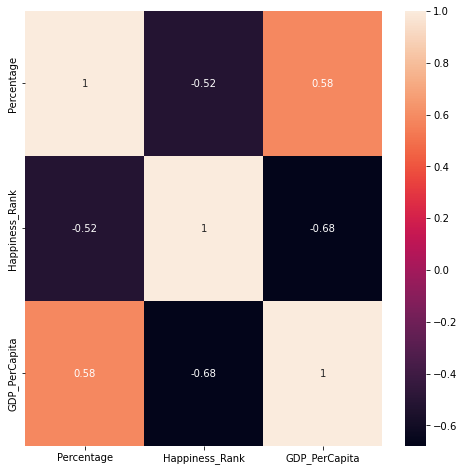

In [10]:
# Plotting a heatmap
f,ax = plt.subplots(figsize=(8,8))
fig_prim_comp_corr = sns.heatmap(df_prim_comp.corr(), annot = True, ax=ax)

For completion rates in primary school, there seems to be a correlation between higher completion rates and higher GDP per capita. It also correlates with the Happiness Rank (inverse correlation coefficient due to Bottom Rank = Higher number). The Top rank in Happiness Rank (low number) also correlates with high GDP.

In [11]:
# Creating subset data for Primary level Completion rate for Male
df_prim_comp_M = df_prim_comp.loc[df['Gender']=='Male']
df_prim_comp_M

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita,Region,Income_Group
1,Afghanistan,Completion rate for children of primary school...,Male,67.199997,146.0,368.754614,South Asia,Low income
9,Angola,Completion rate for children of primary school...,Male,63.278900,NaN,1953.533757,Sub-Saharan Africa,Lower middle income
15,Albania,Completion rate for children of primary school...,Male,94.155960,90.0,6492.872012,Europe & Central Asia,Upper middle income
27,Argentina,Completion rate for children of primary school...,Male,95.666924,57.0,10636.120200,Latin America & Caribbean,Upper middle income
37,Armenia,Completion rate for children of primary school...,Male,99.389252,82.0,4966.513471,Europe & Central Asia,Upper middle income
...,...,...,...,...,...,...,...,...
1065,Yemen,Completion rate for children of primary school...,Male,70.300003,132.0,NaN,Middle East & North Africa,Low income
1077,South Africa,Completion rate for children of primary school...,Male,94.723610,91.0,7055.044776,Sub-Saharan Africa,Upper middle income
1089,Zambia,Completion rate for children of primary school...,Male,70.944771,137.0,1137.343633,Sub-Saharan Africa,Low income
1097,Zimbabwe,Completion rate for children of primary school...,Male,86.400002,144.0,1773.920411,Sub-Saharan Africa,Lower middle income


In [12]:
# Creating subset data for Primary level Completion rate for female
df_prim_comp_F = df_prim_comp.loc[df['Gender']=='Female']
df_prim_comp_F

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita,Region,Income_Group
0,Afghanistan,Completion rate for children of primary school...,Female,40.200001,146.0,368.754614,South Asia,Low income
8,Angola,Completion rate for children of primary school...,Female,56.631340,NaN,1953.533757,Sub-Saharan Africa,Lower middle income
14,Albania,Completion rate for children of primary school...,Female,95.698372,90.0,6492.872012,Europe & Central Asia,Upper middle income
26,Argentina,Completion rate for children of primary school...,Female,98.040077,57.0,10636.120200,Latin America & Caribbean,Upper middle income
36,Armenia,Completion rate for children of primary school...,Female,99.112640,82.0,4966.513471,Europe & Central Asia,Upper middle income
...,...,...,...,...,...,...,...,...
1064,Yemen,Completion rate for children of primary school...,Female,54.799999,132.0,NaN,Middle East & North Africa,Low income
1076,South Africa,Completion rate for children of primary school...,Female,97.922318,91.0,7055.044776,Sub-Saharan Africa,Upper middle income
1088,Zambia,Completion rate for children of primary school...,Female,73.335320,137.0,1137.343633,Sub-Saharan Africa,Low income
1096,Zimbabwe,Completion rate for children of primary school...,Female,91.599998,144.0,1773.920411,Sub-Saharan Africa,Lower middle income


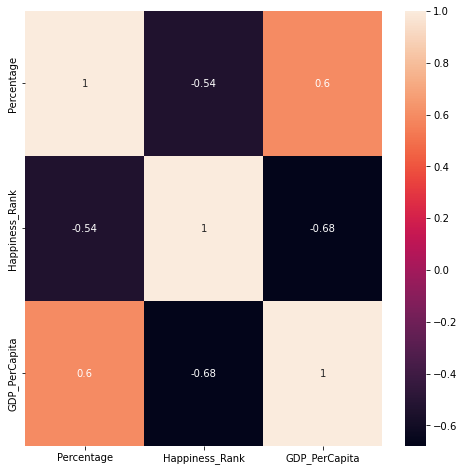

In [13]:
# Plotting a heatmap for primary level completion rates for Male
f,ax = plt.subplots(figsize=(8,8))
fig_prim_comp_M_corr = sns.heatmap(df_prim_comp_M.corr(), annot = True, ax=ax)

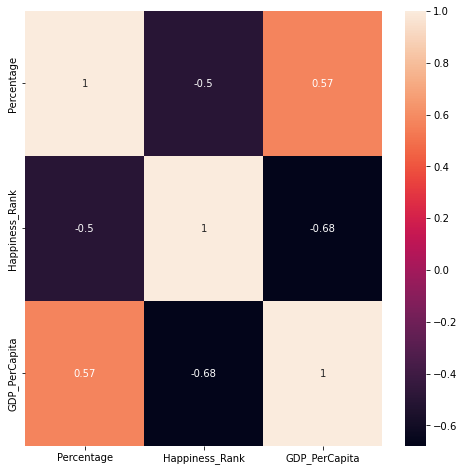

In [14]:
# Plotting a heatmap for primary level completion rates for Female
f,ax = plt.subplots(figsize=(8,8))
fig_prim_comp_F_corr = sns.heatmap(df_prim_comp_F.corr(), annot = True, ax=ax)

Based on the above it seem like the male completion rates at primary level correlates slightly more with the GDP compared to female at primary level (albeit very small difference)

In [15]:
# Creating subset data for Upper Secondary Completion rate
df_upsec_comp = df_sub.loc[df['Indicator']=='Completion rate for youth of upper secondary education school age']
df_upsec_comp 

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita,Region,Income_Group
2,Afghanistan,Completion rate for youth of upper secondary e...,Female,14.365360,146.0,368.754614,South Asia,Low income
3,Afghanistan,Completion rate for youth of upper secondary e...,Male,32.315559,146.0,368.754614,South Asia,Low income
10,Angola,Completion rate for youth of upper secondary e...,Female,15.210190,NaN,1953.533757,Sub-Saharan Africa,Lower middle income
11,Angola,Completion rate for youth of upper secondary e...,Male,23.698139,NaN,1953.533757,Sub-Saharan Africa,Lower middle income
16,Albania,Completion rate for youth of upper secondary e...,Female,79.857063,90.0,6492.872012,Europe & Central Asia,Upper middle income
...,...,...,...,...,...,...,...,...
1091,Zambia,Completion rate for youth of upper secondary e...,Male,33.276039,137.0,1137.343633,Sub-Saharan Africa,Low income
1098,Zimbabwe,Completion rate for youth of upper secondary e...,Female,13.600000,144.0,1773.920411,Sub-Saharan Africa,Lower middle income
1099,Zimbabwe,Completion rate for youth of upper secondary e...,Male,17.200001,144.0,1773.920411,Sub-Saharan Africa,Lower middle income
1108,Kosovo,Completion rate for youth of upper secondary e...,Female,86.600000,32.0,5269.783901,Europe & Central Asia,Upper middle income


In [16]:
# Creating subset data for Upper Secondary Completion rate for Male
df_upsec_comp_M = df_upsec_comp.loc[df['Gender']=='Male']
df_upsec_comp_M

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita,Region,Income_Group
3,Afghanistan,Completion rate for youth of upper secondary e...,Male,32.315559,146.0,368.754614,South Asia,Low income
11,Angola,Completion rate for youth of upper secondary e...,Male,23.698139,NaN,1953.533757,Sub-Saharan Africa,Lower middle income
17,Albania,Completion rate for youth of upper secondary e...,Male,76.226807,90.0,6492.872012,Europe & Central Asia,Upper middle income
29,Argentina,Completion rate for youth of upper secondary e...,Male,54.310711,57.0,10636.120200,Latin America & Caribbean,Upper middle income
39,Armenia,Completion rate for youth of upper secondary e...,Male,68.794182,82.0,4966.513471,Europe & Central Asia,Upper middle income
...,...,...,...,...,...,...,...,...
1067,Yemen,Completion rate for youth of upper secondary e...,Male,36.799999,132.0,NaN,Middle East & North Africa,Low income
1079,South Africa,Completion rate for youth of upper secondary e...,Male,44.761429,91.0,7055.044776,Sub-Saharan Africa,Upper middle income
1091,Zambia,Completion rate for youth of upper secondary e...,Male,33.276039,137.0,1137.343633,Sub-Saharan Africa,Low income
1099,Zimbabwe,Completion rate for youth of upper secondary e...,Male,17.200001,144.0,1773.920411,Sub-Saharan Africa,Lower middle income


In [17]:
# Creating subset data for Upper Secondary Completion rate for Female
df_upsec_comp_F = df_upsec_comp.loc[df['Gender']=='Female']
df_upsec_comp_F

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita,Region,Income_Group
2,Afghanistan,Completion rate for youth of upper secondary e...,Female,14.365360,146.0,368.754614,South Asia,Low income
10,Angola,Completion rate for youth of upper secondary e...,Female,15.210190,NaN,1953.533757,Sub-Saharan Africa,Lower middle income
16,Albania,Completion rate for youth of upper secondary e...,Female,79.857063,90.0,6492.872012,Europe & Central Asia,Upper middle income
28,Argentina,Completion rate for youth of upper secondary e...,Female,65.963852,57.0,10636.120200,Latin America & Caribbean,Upper middle income
38,Armenia,Completion rate for youth of upper secondary e...,Female,79.394547,82.0,4966.513471,Europe & Central Asia,Upper middle income
...,...,...,...,...,...,...,...,...
1066,Yemen,Completion rate for youth of upper secondary e...,Female,23.400000,132.0,NaN,Middle East & North Africa,Low income
1078,South Africa,Completion rate for youth of upper secondary e...,Female,51.866810,91.0,7055.044776,Sub-Saharan Africa,Upper middle income
1090,Zambia,Completion rate for youth of upper secondary e...,Female,26.924601,137.0,1137.343633,Sub-Saharan Africa,Low income
1098,Zimbabwe,Completion rate for youth of upper secondary e...,Female,13.600000,144.0,1773.920411,Sub-Saharan Africa,Lower middle income


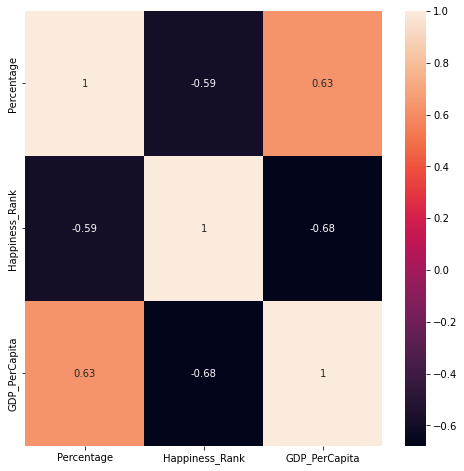

In [18]:
# Plotting a heatmap for upper secondary level completion rates for Male
f,ax = plt.subplots(figsize=(8,8))
fig_upsec_comp_M_corr = sns.heatmap(df_upsec_comp_M.corr(), annot = True, ax=ax)

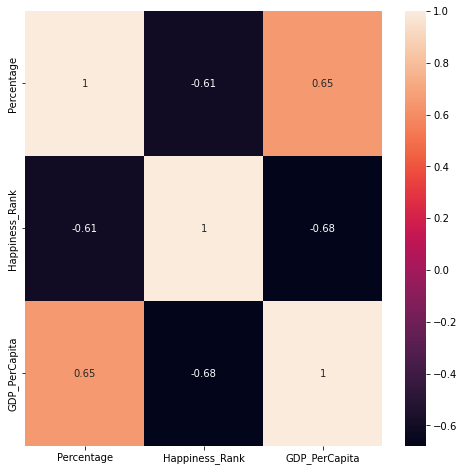

In [19]:
# Plotting a heatmap for upper secondary level completion rates for Female
f,ax = plt.subplots(figsize=(8,8))
fig_upsec_comp_F_corr = sns.heatmap(df_upsec_comp_F.corr(), annot = True, ax=ax)

At Upper secondary level, it show that the correlation between female completion rate with GDP & Happiness rank is slightly stronger than Males. GDP and Happiness rank has the highest correlation of -0.68.

#### Out of School Analysis

In [20]:
# Creating subset data for Primary Out of school rate
df_prim_outsch = df_sub.loc[df['Indicator']=='Out-of-school rate for children of primary school age']
df_prim_outsch

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita,Region,Income_Group
20,Albania,Out-of-school rate for children of primary sch...,Female,1.93244,90.0,6492.872012,Europe & Central Asia,Upper middle income
21,Albania,Out-of-school rate for children of primary sch...,Male,5.54032,90.0,6492.872012,Europe & Central Asia,Upper middle income
42,Armenia,Out-of-school rate for children of primary sch...,Female,10.40104,82.0,4966.513471,Europe & Central Asia,Upper middle income
43,Armenia,Out-of-school rate for children of primary sch...,Male,10.54438,82.0,4966.513471,Europe & Central Asia,Upper middle income
54,Burundi,Out-of-school rate for children of primary sch...,Female,8.42872,NaN,221.477676,Sub-Saharan Africa,Low income
...,...,...,...,...,...,...,...,...
1469,Uzbekistan,Out-of-school rate for children of primary sch...,Male,0.24092,53.0,1983.064723,Europe & Central Asia,Lower middle income
1474,Vanuatu,Out-of-school rate for children of primary sch...,Female,3.91638,NaN,2996.621062,East Asia & Pacific,Lower middle income
1475,Vanuatu,Out-of-school rate for children of primary sch...,Male,2.93369,NaN,2996.621062,East Asia & Pacific,Lower middle income
1480,Venezuela (Bolivarian Republic of),Out-of-school rate for children of primary sch...,Female,9.60201,108.0,NaN,Latin America & Caribbean,Not Available


In [21]:
# Creating correlation matrix for out of school
df_prim_outsch_corr = df_prim_outsch.corr()
df_prim_outsch_corr

,Percentage,Happiness_Rank,GDP_PerCapita
Percentage,1.000000,0.500649,-0.372021
Happiness_Rank,0.500649,1.000000,-0.732537
GDP_PerCapita,-0.372021,-0.732537,1.000000


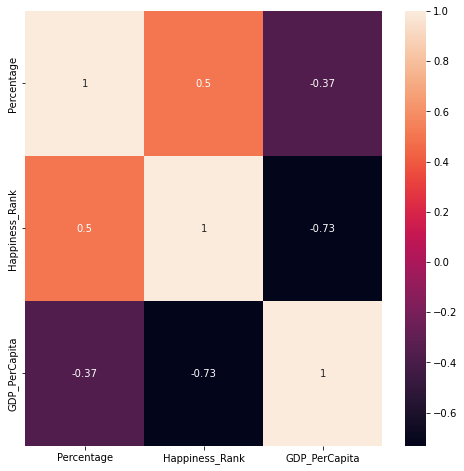

In [22]:
# Plotting a heatmap for Primary out of school children
f,ax = plt.subplots(figsize=(8,8))
fig_prim_comp_outsch_corr = sns.heatmap(df_prim_outsch.corr(), annot = True, ax=ax)

In [23]:
# Creating subset data for Primary out of school children for Male and Female
df_prim_outsch_M = df_prim_outsch.loc[df['Gender']=='Male']
df_prim_outsch_F = df_prim_outsch.loc[df['Gender']=='Female']

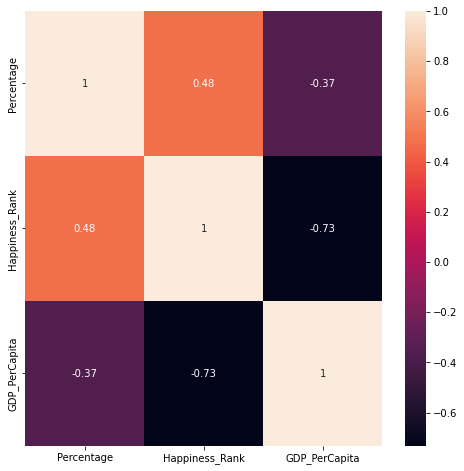

In [24]:
# Plotting heatmap for Primary out of school Male
f,ax = plt.subplots(figsize=(8,8))
fig_prim_outsch_M_corr = sns.heatmap(df_prim_outsch_M.corr(), annot = True, ax=ax)

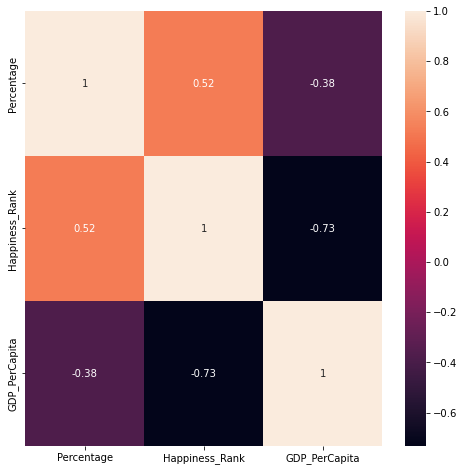

In [25]:
# Plotting heatmap for Primary out of school Female
f,ax = plt.subplots(figsize=(8,8))
fig_prim_outsch_F_corr = sns.heatmap(df_prim_outsch_F.corr(), annot = True, ax=ax)

There's a weak correlation between out of school rate for primary level and the happiness rank. There is also weak correlation on lower out of school percentage and higher GDP. 

In [26]:
# Creating subset data for Upper secondary Out of school rate
df_upsec_outsch = df_sub.loc[df['Indicator']=='Out-of-school rate for youth of upper secondary school age']
df_upsec_outsch

,Country,Indicator,Gender,Percentage,Happiness_Rank,GDP_PerCapita,Region,Income_Group
6,Afghanistan,Out-of-school rate for youth of upper secondar...,Female,68.68825,146.0,368.754614,South Asia,Low income
7,Afghanistan,Out-of-school rate for youth of upper secondar...,Male,43.78052,146.0,368.754614,South Asia,Low income
24,Albania,Out-of-school rate for youth of upper secondar...,Female,15.10066,90.0,6492.872012,Europe & Central Asia,Upper middle income
25,Albania,Out-of-school rate for youth of upper secondar...,Male,21.92466,90.0,6492.872012,Europe & Central Asia,Upper middle income
34,Argentina,Out-of-school rate for youth of upper secondar...,Female,6.61321,57.0,10636.120200,Latin America & Caribbean,Upper middle income
...,...,...,...,...,...,...,...,...
1529,Sweden,Out-of-school rate for youth of upper secondar...,Male,1.42353,7.0,61028.738060,Europe & Central Asia,High income
1530,Tokelau,Out-of-school rate for youth of upper secondar...,Female,28.57143,NaN,NaN,NaN,NaN
1531,Tokelau,Out-of-school rate for youth of upper secondar...,Male,30.55556,NaN,NaN,NaN,NaN
1532,Trinidad and Tobago,Out-of-school rate for youth of upper secondar...,Female,25.00560,NaN,16032.502770,Latin America & Caribbean,High income


In [27]:
# Creating correlation matrix for upsec out of school
df_upsec_outsch_corr = df_upsec_outsch.corr()
df_upsec_outsch_corr

,Percentage,Happiness_Rank,GDP_PerCapita
Percentage,1.000000,0.666998,-0.483341
Happiness_Rank,0.666998,1.000000,-0.736846
GDP_PerCapita,-0.483341,-0.736846,1.000000


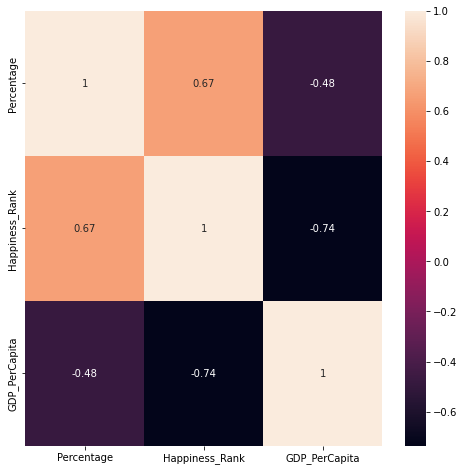

In [28]:
# Plotting a heatmap for Upsec out of school children
f,ax = plt.subplots(figsize=(8,8))
fig_upsec_outsch_corr = sns.heatmap(df_upsec_outsch.corr(), annot = True, ax=ax)

In [29]:
# Creating subset data for Upsec out of school children for Male and Female
df_upsec_outsch_M = df_upsec_outsch.loc[df['Gender']=='Male']
df_upsec_outsch_F = df_upsec_outsch.loc[df['Gender']=='Female']

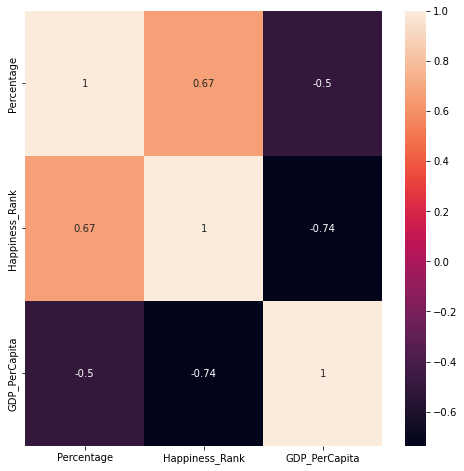

In [30]:
# Plotting heatmap for Upsec out of school Male
f,ax = plt.subplots(figsize=(8,8))
fig_upsec_outsch_M_corr = sns.heatmap(df_upsec_outsch_M.corr(), annot = True, ax=ax)

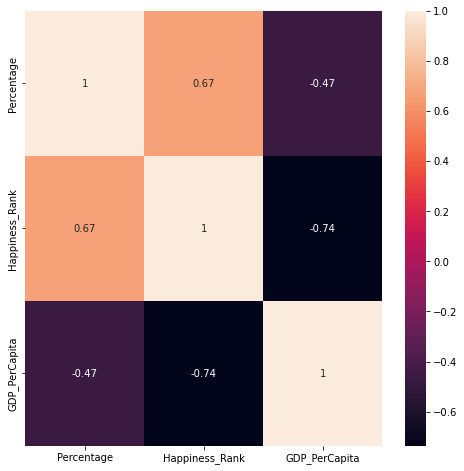

In [31]:
# Plotting heatmap for upsec out of school Female
f,ax = plt.subplots(figsize=(8,8))
fig_upsec_outsch_F_corr = sns.heatmap(df_upsec_outsch_F.corr(), annot = True, ax=ax)

In Upper secondary, the correlation is stronger between out of school rate and the happiness rank. The out of school rate in upsec also has a stronger inverse correlation to the GDP

### Scatterplots

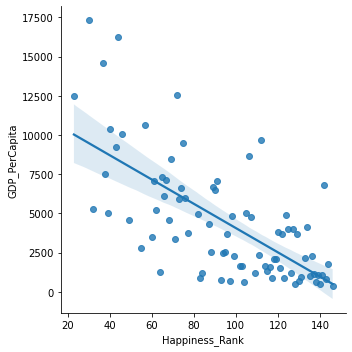

In [32]:
# Plotting GDP and Happiness Rank
fig_scatter_upsec_GDPHap = sns.lmplot(x='Happiness_Rank', y ='GDP_PerCapita', data=df_upsec_comp_M)

Countries that have really high GDPs are among the top ranks in happiness. 

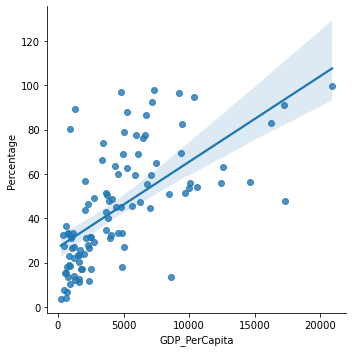

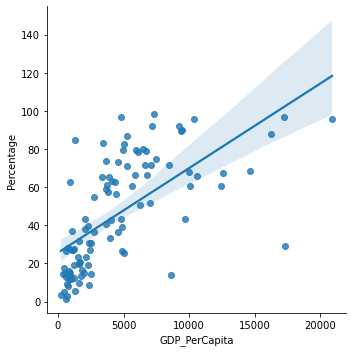

In [33]:
# Plotting relationships between Male and female upper secondary completion rates and GDP
fig_scatter_upsec_comp_M1 = sns.lmplot(x='GDP_PerCapita', y ='Percentage', data=df_upsec_comp_M)
fig_scatter_upsec_comp_F1 = sns.lmplot(x='GDP_PerCapita', y ='Percentage', data=df_upsec_comp_F)

Countries with very low GDP per capita mostly have very low secondary completion rates. However, having high completion rate doesn't necessarily rank you high in GDP

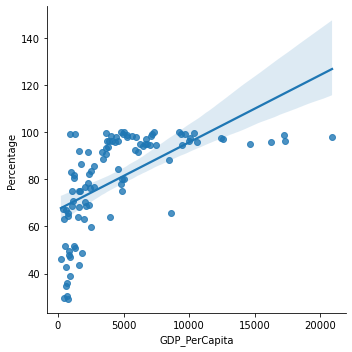

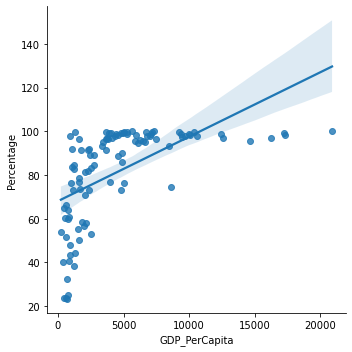

In [34]:
# Plotting relationships between Male & Female primary completion rates and GDP
fig_scatter_prim_comp_M1 = sns.lmplot(x='GDP_PerCapita', y ='Percentage', data=df_prim_comp_M)
fig_scatter_prim_comp_F1 = sns.lmplot(x='GDP_PerCapita', y ='Percentage', data=df_prim_comp_F)

Comparing with primary level completion rate, having 100% completion rates at primary level for both male and female does not affect the gdp greatly

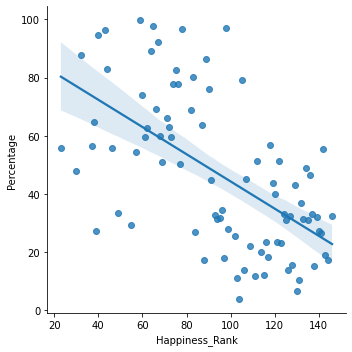

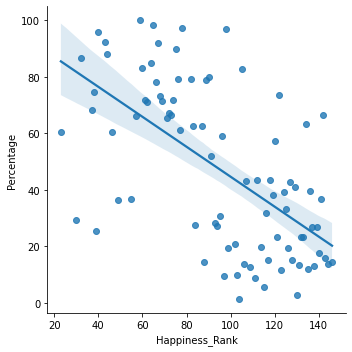

In [35]:
# Plotting relationships between Male and female upper secondary completion rates and Happiness Rank
fig_scatter_upsec_comp_M2 = sns.lmplot(x='Happiness_Rank', y ='Percentage', data=df_upsec_comp_M)
fig_scatter_upsec_comp_F2 = sns.lmplot(x='Happiness_Rank', y ='Percentage', data=df_upsec_comp_F)

Countries ranked top on happiness varies in their upsec education completion percentage. Howeever countries in mid rank of happiness mostly have higher level of upper secondary completion rate

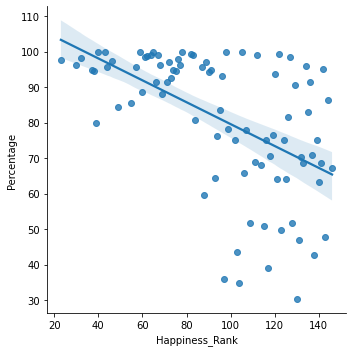

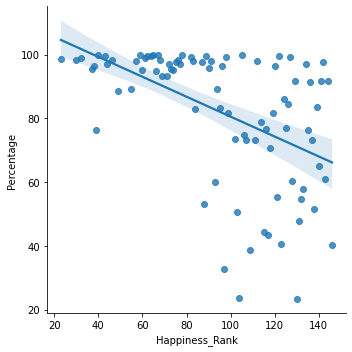

In [36]:
# Plotting relationships between Male and female primary completion rates and Happiness Rank
fig_scatter_prim_comp_M2 = sns.lmplot(x='Happiness_Rank', y ='Percentage', data=df_prim_comp_M)
fig_scatter_prim_comp_F2 = sns.lmplot(x='Happiness_Rank', y ='Percentage', data=df_prim_comp_F)

Having high completion rates for primary level doesn't rank you high in happiness, although there is a cluster of low ranking countries in happiness with low levels of primary level completion rates

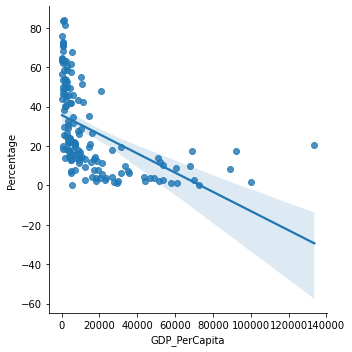

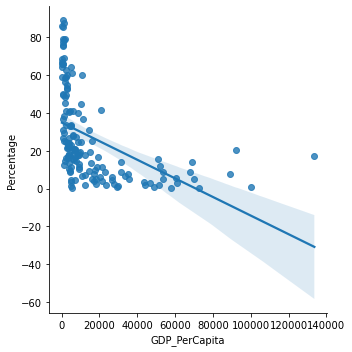

In [37]:
# Plotting relationships between Male and female upper secondary out of shool rate and GDP
fig_scatter_upsec_outsch_M1 = sns.lmplot(x='GDP_PerCapita', y ='Percentage', data=df_upsec_outsch_M)
fig_scatter_upsec_outsch_F1 = sns.lmplot(x='GDP_PerCapita', y ='Percentage', data=df_upsec_outsch_F)

All high GDP countries have low out of school rates for upper secondary, but there are also alot of the countries with low out of school rates for secondary level clustered having very low GDP.

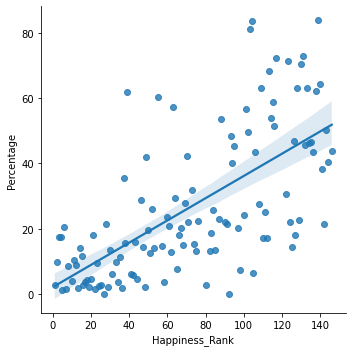

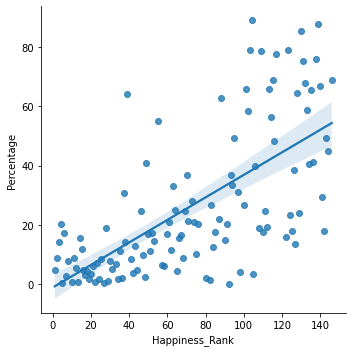

In [38]:
# Plotting relationships between Male and female upper secondary out of school rates and Happiness Rank
fig_scatter_upsec_comp_M2 = sns.lmplot(x='Happiness_Rank', y ='Percentage', data=df_upsec_outsch_M)
fig_scatter_upsec_comp_F2 = sns.lmplot(x='Happiness_Rank', y ='Percentage', data=df_upsec_outsch_F)

Countries that rank top in happiness typically cluster around low outschool rate at secondary level and countries in the bottom rank of happiness have high percentage of out of school

### Pair plots

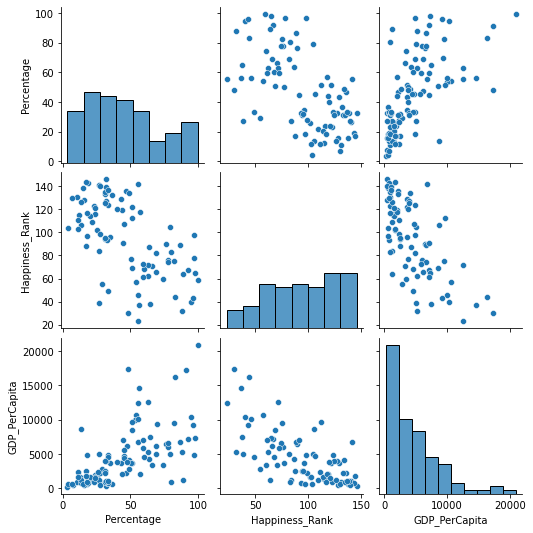

In [39]:
# Pairplot for Upper school completion Male
fig_pplot_upsec_comp_M = sns.pairplot(df_upsec_comp_M)

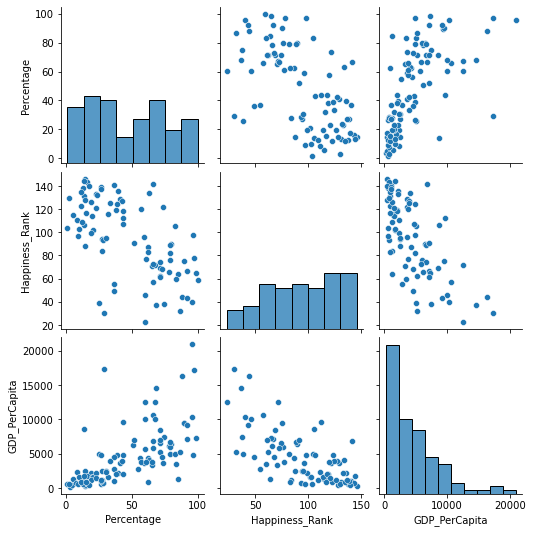

In [40]:
# Pairplot for Upper school completion Female
fig_pplot_upsec_comp_F = sns.pairplot(df_upsec_comp_F)

Countries with low upper school completion percentage has lower GDP and bottom rank in Happiness. Most countries have $0-5000 GDP percapita. To explore further on the connection between GDP ranking and percentage of upperschool completion because of the strong relationship.

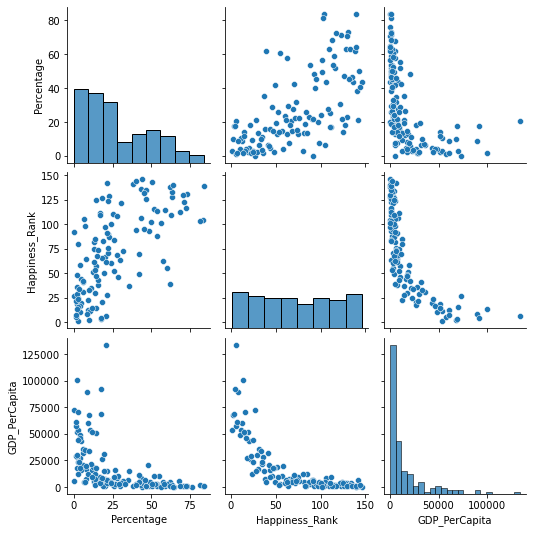

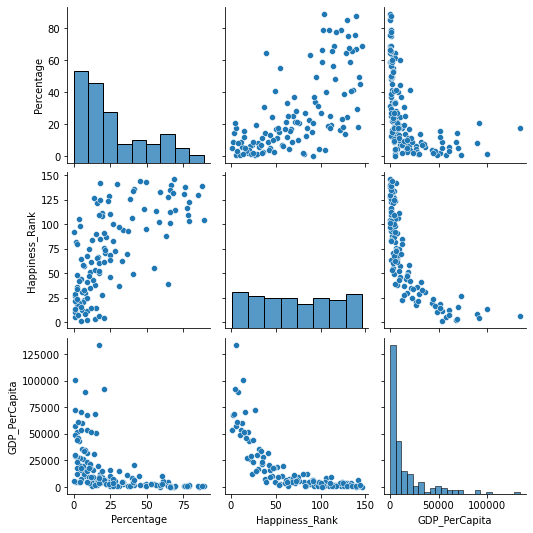

In [41]:
# Pairplot for Upper school out of school Male & F
fig_pplot_upsec_outsch_M = sns.pairplot(df_upsec_outsch_M)
fig_pplot_upsec_outsch_F = sns.pairplot(df_upsec_outsch_F)

The lower out of school rate is, the more it tops happiness rank. High out of school rate definitely have low GDP. Being in median GDP puts you in top 50 Happiness rank.

### Categorical Plots

In [42]:
df_upsec_comp_M.describe()

,Percentage,Happiness_Rank,GDP_PerCapita
count,107.000000,87.000000,103.000000
mean,45.474824,94.712644,4564.640449
std,26.285462,33.227163,4194.947900
min,3.600000,23.000000,221.477676
25%,24.668104,68.500000,1297.927680
50%,43.900002,97.000000,3690.627878
75%,62.843244,123.500000,6360.569660
max,99.699997,146.000000,20908.582700


<AxesSubplot:xlabel='Percentage', ylabel='Count'>

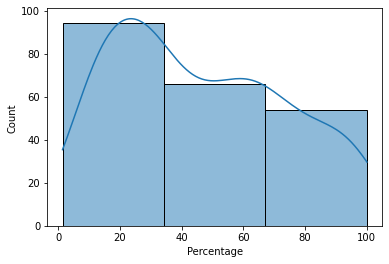

In [43]:
# Understanding distribution of Completion rates for Upsec
sns.histplot(df_upsec_comp['Percentage'], bins = 3, kde = True)

In [44]:
# Creating buckets for upperschool Percentage completion for male
df_upsec_comp_M.loc[df_upsec_comp_M['Percentage']<35,'Percentage_Class']='Low Percentage'
df_upsec_comp_M.loc[(df_upsec_comp_M['Percentage']>=35) & (df_upsec_comp_M['Percentage']<75),'Percentage_Class']='Mid Percentage'
df_upsec_comp_M.loc[df_upsec_comp_M['Percentage']>=75,'Percentage_Class']='High Percentage'

C:\Users\Azalia\AppData\Local\Temp\ipykernel_47824\1305234624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsec_comp_M.loc[df_upsec_comp_M['Percentage']<35,'Percentage_Class']='Low Percentage'


In [45]:
df_upsec_comp_M['Percentage_Class'].value_counts(dropna = False)

Low Percentage     49
Mid Percentage     39
High Percentage    19
Name: Percentage_Class, dtype: int64

In [46]:
# Creating buckets for upperschool Percentage completion for female
df_upsec_comp_F.loc[df_upsec_comp_F['Percentage']<35,'Percentage_Class']='Low Percentage'
df_upsec_comp_F.loc[(df_upsec_comp_F['Percentage']>=35) & (df_upsec_comp_F['Percentage']<75),'Percentage_Class']='Mid Percentage'
df_upsec_comp_F.loc[df_upsec_comp_F['Percentage']>=75,'Percentage_Class']='High Percentage'

C:\Users\Azalia\AppData\Local\Temp\ipykernel_47824\2768536967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsec_comp_F.loc[df_upsec_comp_F['Percentage']<35,'Percentage_Class']='Low Percentage'


<AxesSubplot:xlabel='GDP_PerCapita', ylabel='Count'>

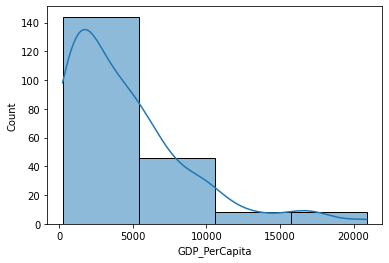

In [47]:
# Understanding distribution of GDP per Capita
sns.histplot(df_upsec_comp['GDP_PerCapita'], bins = 4, kde = True)

In [48]:
# Creating buckets for GDP for upper school completion M to understand metrics of Income_Group
df_upsec_comp_M.loc[df_upsec_comp_M['GDP_PerCapita']<1000,'GDP_Class']='Low GDP'
df_upsec_comp_M.loc[(df_upsec_comp_M['GDP_PerCapita']>=1000) & (df_upsec_comp_M['GDP_PerCapita']<4200),'GDP_Class']='Lower Mid Rank'
df_upsec_comp_M.loc[(df_upsec_comp_M['GDP_PerCapita']>=4200) & (df_upsec_comp_M['GDP_PerCapita']<11000),'GDP_Class']='Upper Mid Rank'
df_upsec_comp_M.loc[df_upsec_comp_M['GDP_PerCapita']>=17000,'GDP_Class']='High GDP'

C:\Users\Azalia\AppData\Local\Temp\ipykernel_47824\2582230174.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsec_comp_M.loc[df_upsec_comp_M['GDP_PerCapita']<1000,'GDP_Class']='Low GDP'


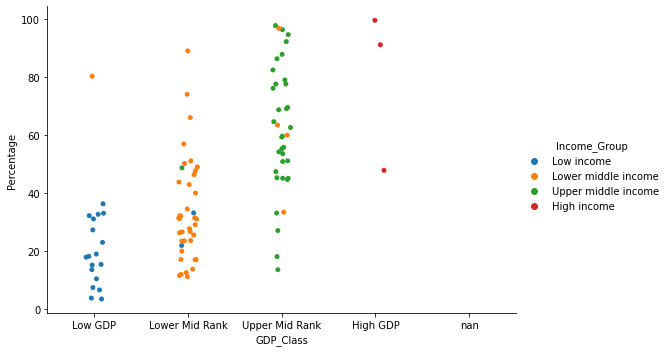

In [49]:
# Checking income group buckets with GDP per Capita to get basis of income_group
fig_catplt_upsec_comp_M = sns.catplot(x='GDP_Class',y='Percentage',hue='Income_Group',data=df_upsec_comp_M,aspect=1.5)

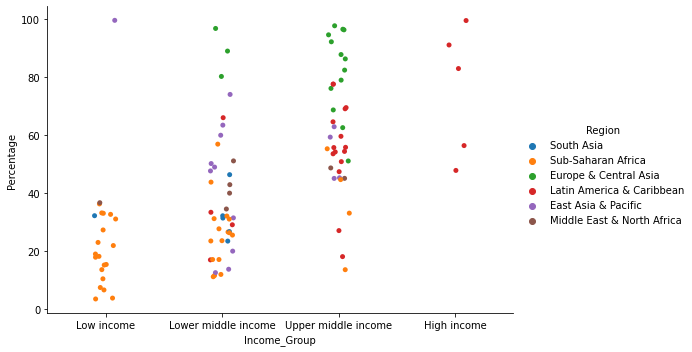

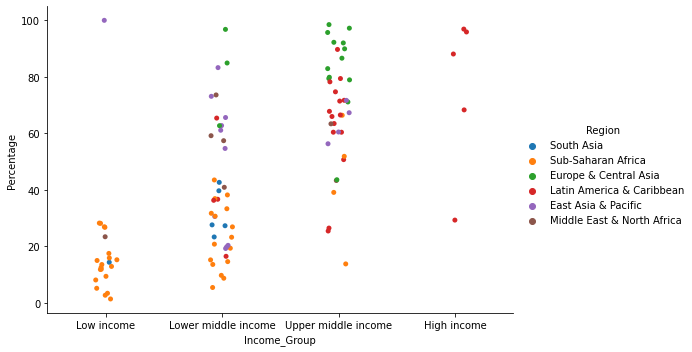

In [50]:
# Using Income Group as categorical value for GDP
# Create categorical plot for GDP categories, and percentage for upperschool completion male & Female
fig_catplt_upsec_comp_M1 = sns.catplot(x='Income_Group',y='Percentage',hue='Region',data=df_upsec_comp_M,aspect=1.5)
fig_catplt_upsec_comp_F1 = sns.catplot(x='Income_Group',y='Percentage',hue='Region',data=df_upsec_comp_F,aspect=1.5)

Europe and Central Asia is the region with the most highest uppersecondary completion rates. Interesting to note that Latin America & Carribean region consists of high income nations but with varying completion level.

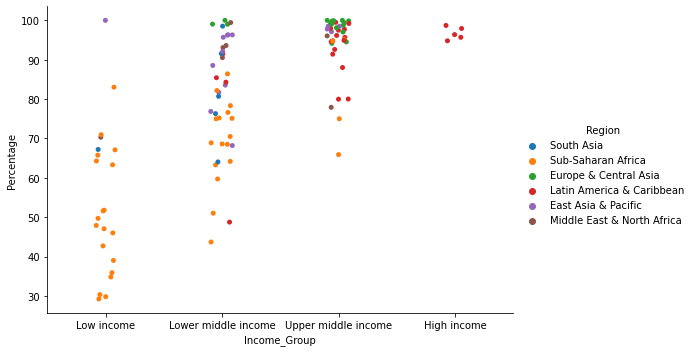

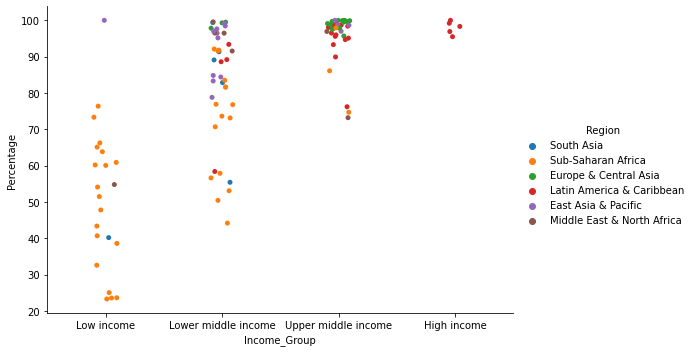

In [51]:
# Create categorical plot for GDP categories, and percentage for primary completion male & female
fig_catplt_prim_comp_M1 = sns.catplot(x='Income_Group',y='Percentage',hue='Region',data=df_prim_comp_M,aspect=1.5)
fig_catplt_prim_comp_F1 = sns.catplot(x='Income_Group',y='Percentage',hue='Region',data=df_prim_comp_F,aspect=1.5)

The high income nations all have high percentage of completion for primary level. The countries in Sub-saharan African region is still far from getting high completion rates

In [52]:
# Creating buckets for Happiness Rank for upper school completion M
df_upsec_comp_M.loc[df_upsec_comp_M['Happiness_Rank']<51,'Happiness_Rank_Class']='Top Rank'
df_upsec_comp_M.loc[(df_upsec_comp_M['Happiness_Rank']>=51) & (df_upsec_comp_M['Happiness_Rank']<100),'Happiness_Rank_Class']='Mid Rank'
df_upsec_comp_M.loc[df_upsec_comp_M['Happiness_Rank']>=100,'Happiness_Rank_Class']='Bottom Rank'

C:\Users\Azalia\AppData\Local\Temp\ipykernel_47824\2954845514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsec_comp_M.loc[df_upsec_comp_M['Happiness_Rank']<51,'Happiness_Rank_Class']='Top Rank'


In [53]:
df_upsec_comp_M['Happiness_Rank_Class'].value_counts(dropna = False)

Bottom Rank    41
Mid Rank       35
NaN            20
Top Rank       11
Name: Happiness_Rank_Class, dtype: int64

In [54]:
# Creating buckets for Happiness Rank for upper school completion F
df_upsec_comp_F.loc[df_upsec_comp_F['Happiness_Rank']<51,'Happiness_Rank_Class']='Top Rank'
df_upsec_comp_F.loc[(df_upsec_comp_F['Happiness_Rank']>=51) & (df_upsec_comp_F['Happiness_Rank']<100),'Happiness_Rank_Class']='Mid Rank'
df_upsec_comp_F.loc[df_upsec_comp_F['Happiness_Rank']>=100,'Happiness_Rank_Class']='Bottom Rank'

C:\Users\Azalia\AppData\Local\Temp\ipykernel_47824\2737816064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsec_comp_F.loc[df_upsec_comp_F['Happiness_Rank']<51,'Happiness_Rank_Class']='Top Rank'


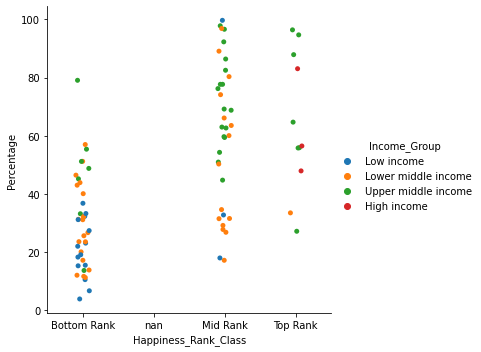

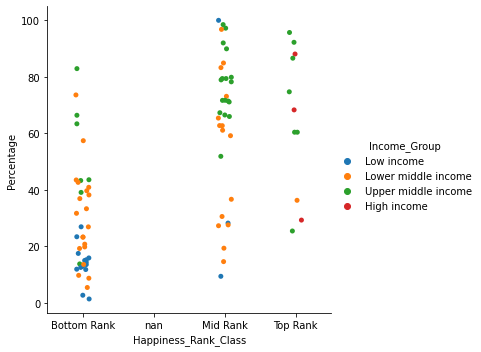

In [55]:
# Creating catplot for Happiness Rank class against uppersec completion rates for M & F 
fig_catplt_upsec_comp_M2 = sns.catplot(x='Happiness_Rank_Class',y='Percentage',hue='Income_Group',data=df_upsec_comp_M)
fig_catplt_upsec_comp_F2 = sns.catplot(x='Happiness_Rank_Class',y='Percentage',hue='Income_Group',data=df_upsec_comp_F)

Countries that rank top in happiness mainly comes from the upper and high income nation but the percentage of upper secondary school completion varies

In [56]:
# Creating buckets for Happiness Rank for upper school out of school M
df_upsec_outsch_M.loc[df_upsec_outsch_M['Happiness_Rank']<51,'Happiness_Rank_Class']='Top Rank'
df_upsec_outsch_M.loc[(df_upsec_outsch_M['Happiness_Rank']>=51) & (df_upsec_outsch_M['Happiness_Rank']<100),'Happiness_Rank_Class']='Mid Rank'
df_upsec_outsch_M.loc[df_upsec_outsch_M['Happiness_Rank']>=100,'Happiness_Rank_Class']='Bottom Rank'

C:\Users\Azalia\AppData\Local\Temp\ipykernel_47824\2012682636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsec_outsch_M.loc[df_upsec_outsch_M['Happiness_Rank']<51,'Happiness_Rank_Class']='Top Rank'


In [57]:
# Creating buckets for Happiness Rank for upper school out of school F
df_upsec_outsch_F.loc[df_upsec_outsch_F['Happiness_Rank']<51,'Happiness_Rank_Class']='Top Rank'
df_upsec_outsch_F.loc[(df_upsec_outsch_F['Happiness_Rank']>=51) & (df_upsec_outsch_M['Happiness_Rank']<100),'Happiness_Rank_Class']='Mid Rank'
df_upsec_outsch_F.loc[df_upsec_outsch_F['Happiness_Rank']>=100,'Happiness_Rank_Class']='Bottom Rank'

C:\Users\Azalia\AppData\Local\Temp\ipykernel_47824\1702146175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_upsec_outsch_F.loc[df_upsec_outsch_F['Happiness_Rank']<51,'Happiness_Rank_Class']='Top Rank'


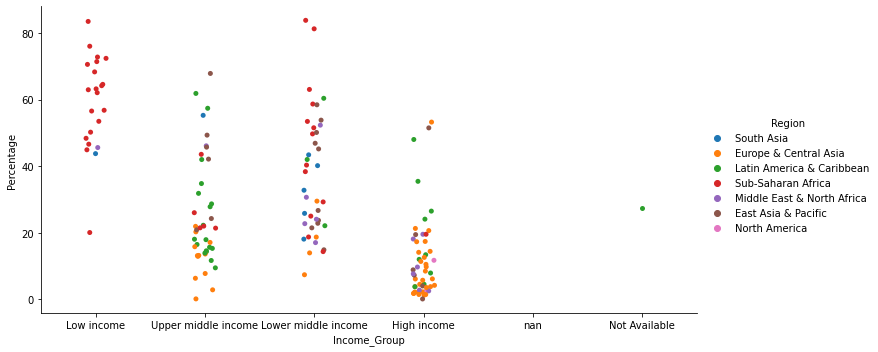

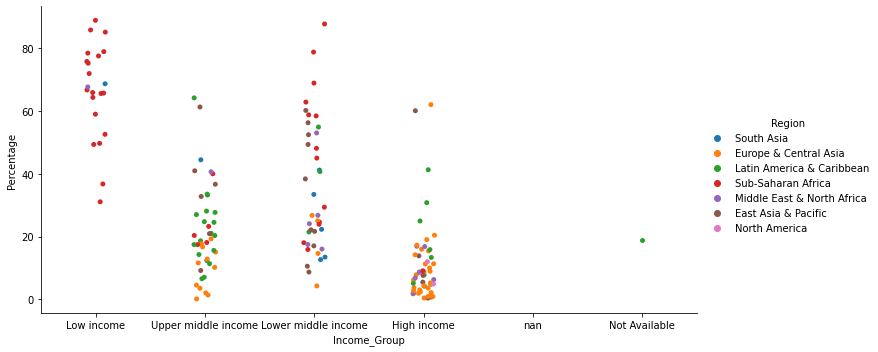

In [58]:
# Create categorical plot for GDP categories, and percentage for upperschool out of school male & female
fig_catplt_upsec_outsch_M1 = sns.catplot(x='Income_Group',y='Percentage',hue='Region',data=df_upsec_outsch_M,aspect=2)
fig_catplt_upsec_outsch_F1 = sns.catplot(x='Income_Group',y='Percentage',hue='Region',data=df_upsec_outsch_F,aspect=2)

High income nations mostly have lower out of school rate for upper secondary level

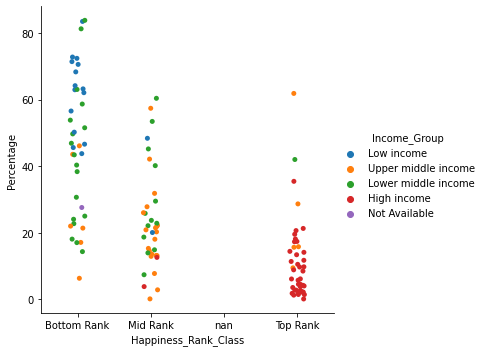

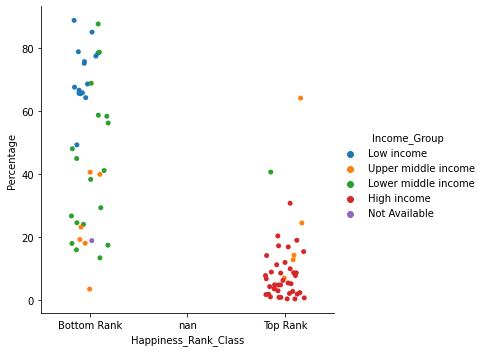

In [59]:
# Creating catplot for Happiness Rank class against uppersec out of school rates for M & F 
fig_catplt_upsec_outsch_M2 = sns.catplot(x='Happiness_Rank_Class',y='Percentage',hue='Income_Group',data=df_upsec_outsch_M)
fig_catplt_upsec_outsch_F2 = sns.catplot(x='Happiness_Rank_Class',y='Percentage',hue='Income_Group',data=df_upsec_outsch_F)

# 4. Exporting Figures

In [60]:
fig_prim_comp_M_corr.figure.savefig((os.path.join(path,'04 Analysis','heatmap_prim_comp_M.png')))
fig_prim_comp_F_corr.figure.savefig((os.path.join(path,'04 Analysis','heatmap_prim_comp_F.png')))
fig_upsec_comp_M_corr.figure.savefig((os.path.join(path,'04 Analysis','heatmap_upsec_comp_M.png')))
fig_upsec_comp_F_corr.figure.savefig((os.path.join(path,'04 Analysis','heatmap_upsec_comp_F.png')))
fig_prim_outsch_M_corr.figure.savefig((os.path.join(path,'04 Analysis','heatmap_prim_outsch_M.png')))
fig_prim_outsch_F_corr.figure.savefig((os.path.join(path,'04 Analysis','heatmap_prim_outsch_F.png')))
fig_scatter_upsec_comp_M1.figure.savefig((os.path.join(path,'04 Analysis','scatter_upsec_comp_MGDP.png')))
fig_scatter_upsec_comp_F1.figure.savefig((os.path.join(path,'04 Analysis','scatter_upsec_comp_FGDP.png')))
fig_scatter_prim_comp_M1.figure.savefig((os.path.join(path,'04 Analysis','scatter_prim_comp_MGDP.png')))
fig_scatter_prim_comp_F1.figure.savefig((os.path.join(path,'04 Analysis','scatter_prim_comp_FGDP.png')))
fig_scatter_upsec_comp_M2.figure.savefig((os.path.join(path,'04 Analysis','scatter_upsec_comp_MHap.png')))
fig_scatter_upsec_comp_F2.figure.savefig((os.path.join(path,'04 Analysis','scatter_upsec_comp_FHap.png')))
fig_scatter_prim_comp_M2.savefig((os.path.join(path,'04 Analysis','scatter_prim_comp_MHap.png')))
fig_scatter_prim_comp_F2.savefig((os.path.join(path,'04 Analysis','scatter_prim_comp_FHap.png')))
fig_scatter_upsec_outsch_M1.savefig((os.path.join(path,'04 Analysis','scatter_upsec_outsch_MGDP.png')))
fig_scatter_upsec_outsch_F1.savefig((os.path.join(path,'04 Analysis','scatter_upsec_outsch_FGDP.png')))
fig_scatter_upsec_comp_M2.savefig((os.path.join(path,'04 Analysis','scatter_upsec_outsch_MHap.png')))
fig_scatter_upsec_comp_F2.savefig((os.path.join(path,'04 Analysis','scatter_upsec_outsch_FHap.png')))
fig_pplot_upsec_comp_M.savefig((os.path.join(path,'04 Analysis','pairplot_upsec_comp_M.png')))
fig_pplot_upsec_comp_F.savefig((os.path.join(path,'04 Analysis','pairplot_upsec_comp_F.png')))
fig_pplot_upsec_outsch_M.savefig((os.path.join(path,'04 Analysis','pairplot_upsec_outsch_M.png')))
fig_pplot_upsec_outsch_F.savefig((os.path.join(path,'04 Analysis','pairplot_upsec_outsch_F.png')))
fig_catplt_upsec_comp_M1.savefig((os.path.join(path,'04 Analysis','catplot_upsec_comp_MInc.png')))
fig_catplt_upsec_comp_F1.savefig((os.path.join(path,'04 Analysis','catplot_upsec_comp_FInc.png')))
fig_catplt_prim_comp_M1.savefig((os.path.join(path,'04 Analysis','catplot_prim_comp_MInc.png')))
fig_catplt_prim_comp_F1.savefig((os.path.join(path,'04 Analysis','catplot_prim_comp_FInc.png')))
fig_catplt_upsec_comp_M2.savefig((os.path.join(path,'04 Analysis','catplot_prim_comp_MHap.png')))
fig_catplt_upsec_comp_F2.savefig((os.path.join(path,'04 Analysis','catplot_prim_comp_MHap.png')))
fig_catplt_upsec_outsch_M2.savefig((os.path.join(path,'04 Analysis','catplot_upsec_outsch_MHap.png')))
fig_catplt_upsec_outsch_F2.savefig((os.path.join(path,'04 Analysis','catplot_upsec_outsch_FHap.png')))
fig_catplt_upsec_outsch_M1.savefig((os.path.join(path,'04 Analysis','catplot_upsec_outsch_MInc.png')))
fig_catplt_upsec_outsch_F1.savefig((os.path.join(path,'04 Analysis','catplot_upsec_outsch_FInc.png')))

# 5. Answering Questions

##### 1.	Which country has the highest and lowest primary/lower secondary/upper secondary school completion for Male and Female?
            Lowest Primary Completion Male: Niger, Chad, Central African Republic
##### 2.	Which country has the highest and lowest primary/lower secondary/upper secondary school out of school rate for Male and Female?
##### 3.	Is the state of education affected by Region or Country Income Group?
    At primary level, yes, all high income countries have high completion rate. But at secondary level, the completion rate varies.
##### 4.	Does a country’s rank in Happiness correlates with GDP?
    Yes. Countries that have really high GDPs ranks among the top in happiness and there a clusters of countries with very low GDP in the bottom rank

#### Additional hypothesis
1. Countries with gender equality in education have higher GDPs and Happiness level
2. Countries with high female completion rate and low out of school rates have higher GDPs and Happiness level